In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
actions=np.load("Desktop/Decision Tree/actions_L.npy")

In [3]:
#actions=np.load("Desktop/Decision Tree/actions.npy")

In [4]:
states=np.load("Desktop/Decision Tree/states_L.npy")

In [5]:
states.shape

(28320, 15, 1)

In [6]:
actions.shape

(28320,)

In [7]:
print(actions)

[2 2 2 ... 2 2 2]


In [8]:
bin=[-1,-0.6,-0.2,0.2,0.6,1]
state15vector=states[1,:,0]
hist,bin = np.histogram(state15vector,bins = bin)
print (hist)
B = np.reshape(hist, (5, -1))
print(B.shape)


[1 6 6 1 1]
(5, 1)


In [9]:
count_actions = np.bincount(actions)
for i in range (3):
    print(count_actions[i])

2334
10243
15743


In [10]:
bin_state = np.zeros((28320, 5, 1))
for i in range(28320):
    bin=[-1,-0.6,-0.2,0.2,0.6,1]
    state15vector=states[i,:,0]
    hist,bin = np.histogram(state15vector,bins = bin)
    print (hist)
    #B = np.reshape(hist, (5, -1))
    bin_state[i,:,0]=hist

[3 3 4 2 3]
[1 6 6 1 1]
[1 3 7 2 2]
[1 5 5 1 3]
[1 4 7 0 3]
[1 3 6 3 2]
[1 4 9 0 1]
[2 5 6 0 2]
[1 5 6 1 2]
[1 4 6 1 3]
[0 3 5 3 4]
[0 2 8 3 2]
[0 3 7 1 4]
[1 2 7 3 2]
[0 5 6 2 2]
[2 3 5 2 3]
[0 4 6 3 2]
[1 1 7 2 4]
[2 4 5 1 3]
[0 4 5 1 5]
[2 2 6 1 4]
[1 4 8 2 0]
[2 3 6 1 3]
[1 4 5 1 4]
[3 3 4 1 4]
[2 5 6 0 2]
[3 2 4 4 2]
[2 1 7 1 4]
[1 3 6 1 4]
[1 3 6 3 2]
[3 3 6 1 2]
[2 1 7 2 3]
[0 5 6 1 3]
[3 4 4 1 3]
[1 6 6 0 2]
[0 1 9 3 2]
[0 2 9 2 2]
[1 3 6 2 3]
[2 3 3 4 3]
[1 3 8 2 1]
[3 5 4 2 1]
[1 4 5 3 2]
[1 2 7 1 4]
[3 3 6 2 1]
[1 5 6 0 3]
[1 2 7 1 4]
[3 2 6 1 3]
[0 5 5 3 2]
[2 5 4 1 3]
[2 3 6 1 3]
[1 6 6 1 1]
[0 3 9 1 2]
[1 6 6 1 1]
[2 4 4 1 4]
[3 4 5 1 2]
[0 3 5 3 4]
[0 6 6 2 1]
[2 2 7 1 3]
[4 3 6 1 1]
[0 6 4 2 3]
[3 4 5 1 2]
[2 5 3 1 4]
[2 4 6 0 3]
[1 4 4 1 5]
[1 6 3 2 3]
[2 4 4 2 3]
[1 5 4 1 4]
[1 5 2 3 4]
[2 5 2 1 5]
[2 8 2 0 3]
[1 7 4 0 3]
[1 5 5 1 3]
[4 6 1 1 3]
[2 5 3 0 5]
[2 5 5 0 3]
[1 4 3 3 4]
[4 5 3 1 2]
[2 6 1 1 5]
[5 4 2 0 4]
[1 8 3 1 2]
[1 5 3 2 4]
[1 8 1 2 3]
[2 4 4 1 4]
[1 7

In [11]:
bin_state=bin_state.reshape(28320,5)
print(bin_state)
new_bin_state = []
for bin_s in bin_state:
    new_bin_s = []
    for elem in bin_s:
        elem /= 15.0
        new_bin_s.append(elem)
    new_bin_state.append(new_bin_s)
bin_state = np.array(new_bin_state)
print(bin_state)
print(np.sum(bin_state[0]))

[[3. 3. 4. 2. 3.]
 [1. 6. 6. 1. 1.]
 [1. 3. 7. 2. 2.]
 ...
 [2. 4. 4. 3. 2.]
 [2. 2. 6. 2. 3.]
 [2. 4. 6. 1. 2.]]
[[0.2        0.2        0.26666667 0.13333333 0.2       ]
 [0.06666667 0.4        0.4        0.06666667 0.06666667]
 [0.06666667 0.2        0.46666667 0.13333333 0.13333333]
 ...
 [0.13333333 0.26666667 0.26666667 0.2        0.13333333]
 [0.13333333 0.13333333 0.4        0.13333333 0.2       ]
 [0.13333333 0.26666667 0.4        0.06666667 0.13333333]]
1.0


In [12]:
bin_state[0]

array([0.2       , 0.2       , 0.26666667, 0.13333333, 0.2       ])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(bin_state, actions, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)

(22656, 5)


In [93]:
# Create Decision Tree classifer object
model = RandomForestClassifier(n_estimators=8, max_depth=4, criterion='entropy' )

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [94]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [95]:
# estimator = model.estimators_[3]

In [96]:
# for i in range(len(y_pred)):
#     print(y_pred[i])

In [97]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.5540 accuracy with a standard deviation of 0.0002


In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5637358757062146


In [76]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='micro'))


0.5628531073446328
0.5628531073446328


In [77]:
feature_cols = ['Far Left', 'Left', 'Moderate', 'Right','Far Right']

In [78]:
class_names1 = ['Left Video', 'Moderate Video', 'Right Video']

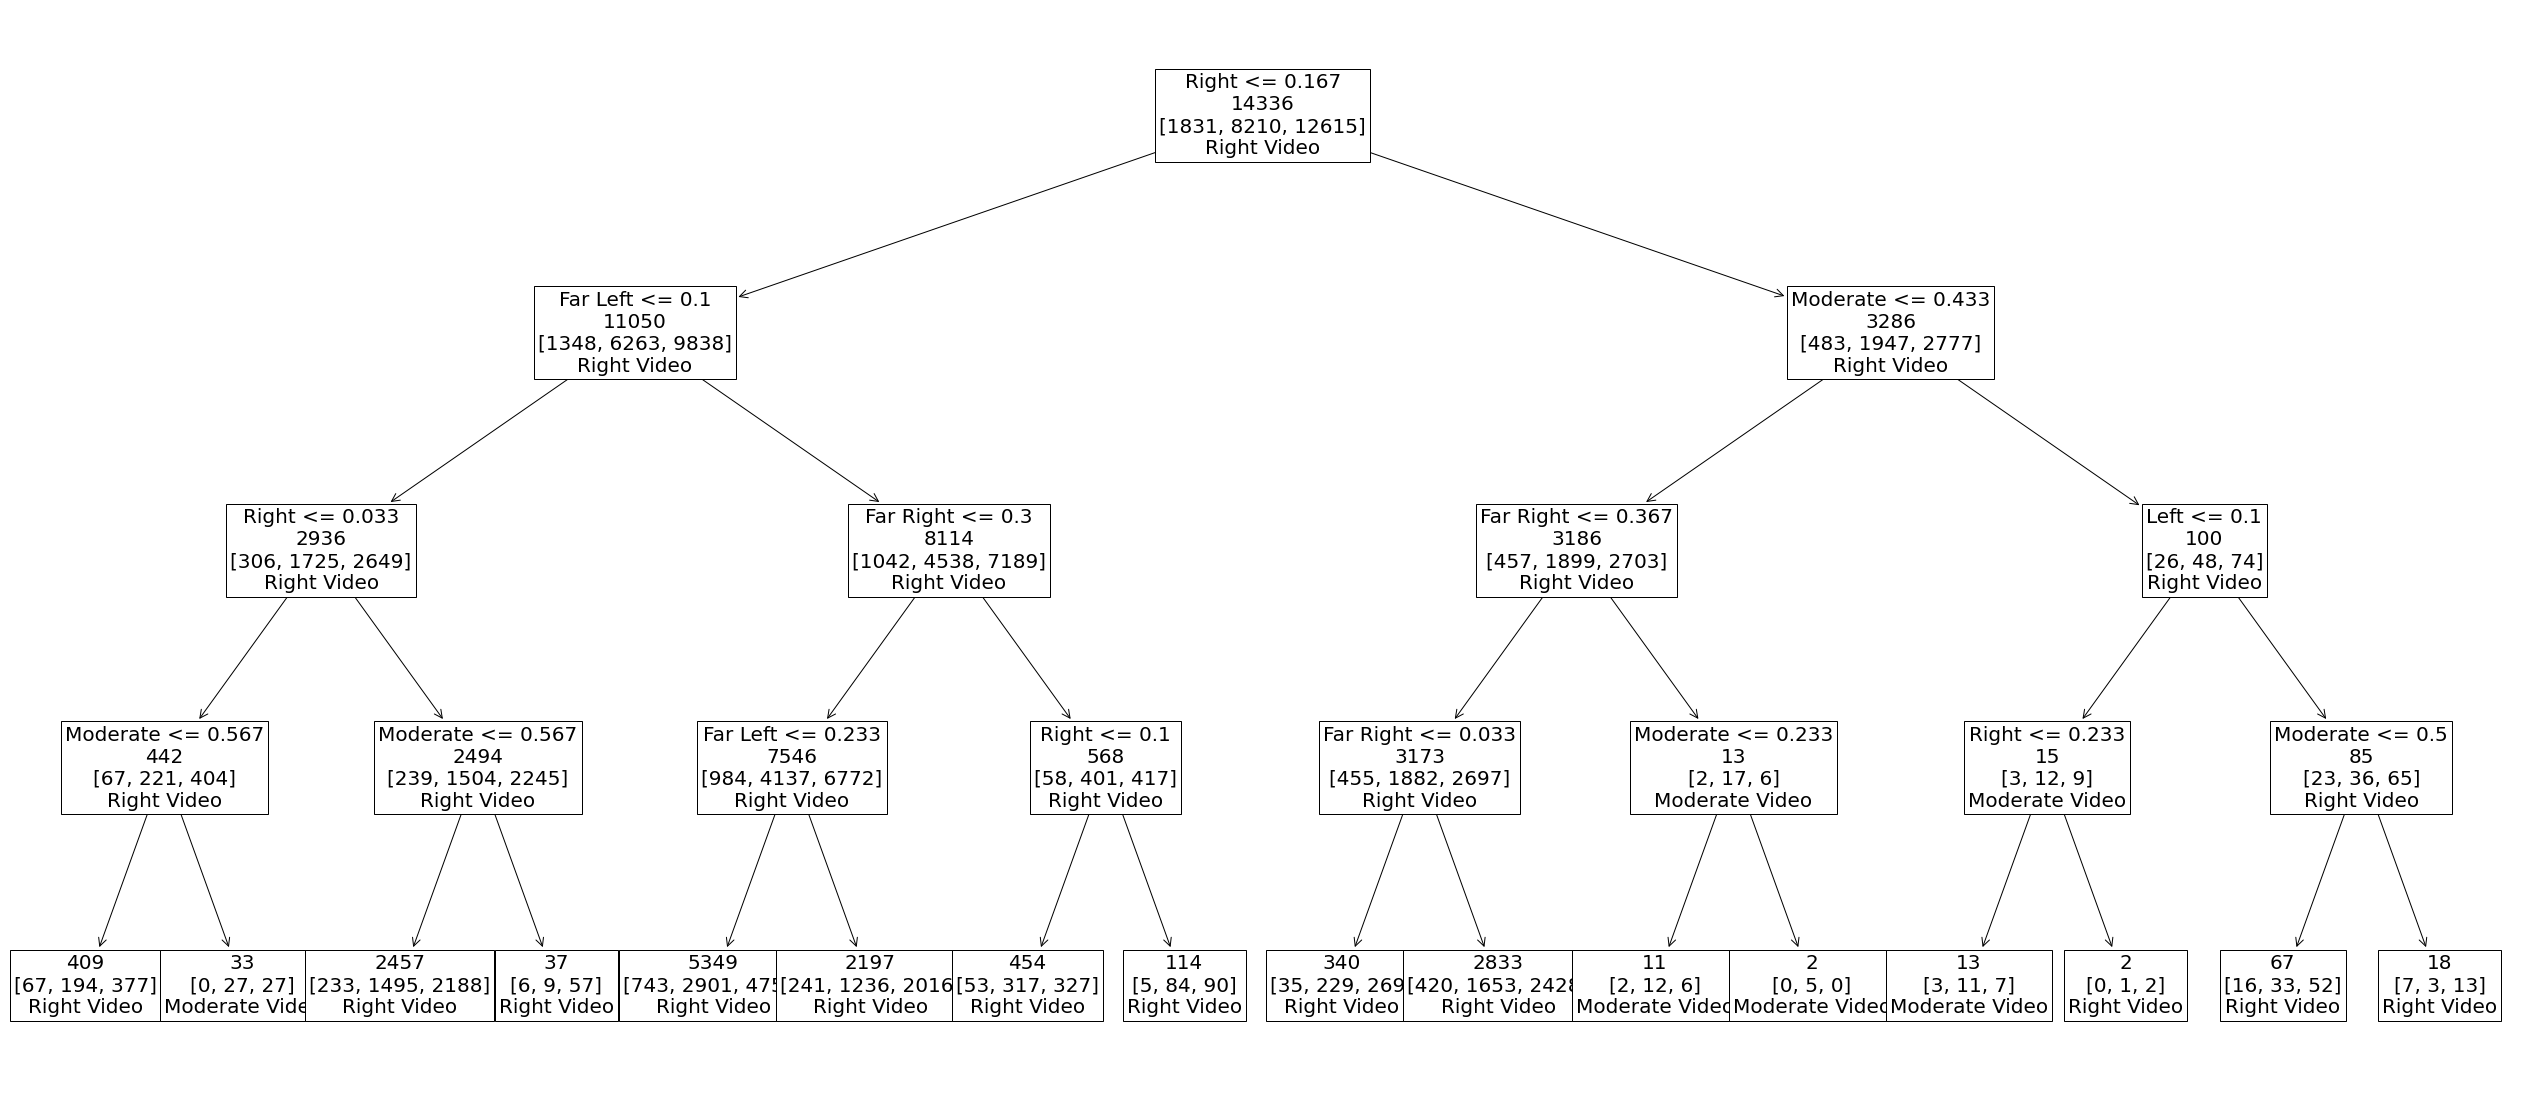

In [79]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(estimator, 
                   feature_names=feature_cols,  
                   class_names=class_names1,label='none', impurity=False,
                   filled=False, fontsize=20)
fig.savefig('DT w Binning for Left user RF.png')
plt.show()